# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided an example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

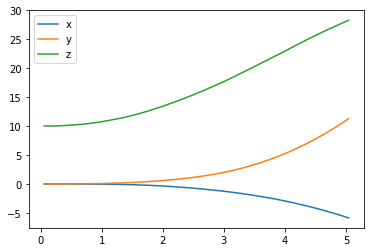

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

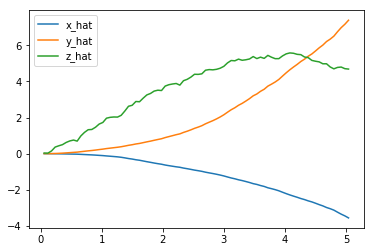

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

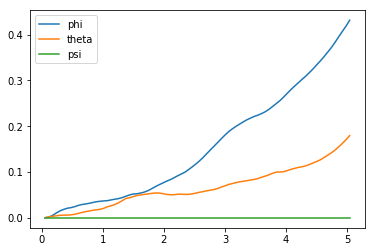

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

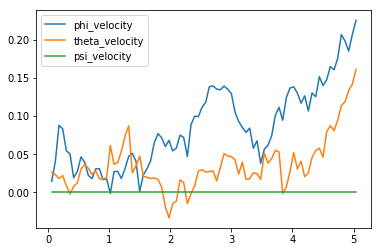

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

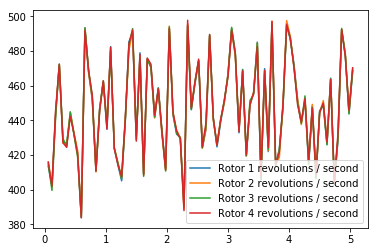

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-5.8587542  11.27746044 28.26690953  0.43118498  0.17957381  0.        ]
[-3.56018276  7.38926932  4.68464662]
[0.22564825 0.16135246 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs (يشوش أو يجعل شخص منزعج، أو فيزيائيا: يؤثر على نظام ليجعله يغير سيره الطبييعى) the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([10., 10., 20.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 1218.774 (best = 1262.204), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from agents.DDPG_Agent import DDPGAgent
from task import Task
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [11]:
## TODO: Train your agent here.
runtime = 10
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([100., 100., 100.])

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPGAgent(task)

num_episodes = 1000
best_total_reward = -np.inf
best_stat = None
rewards = []
best_results = None

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

# Run the simulation, and save the results.
for i_episode in range(1, num_episodes+1):
    
    done = False
    state = agent.reset_episode()    
    total_reward = 0.0
    
    results_episode = {x : [] for x in labels}
        
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward

        result = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        
        for ii in range(len(labels)):
            results_episode[labels[ii]].append(result[ii])

        if done:
            rewards.append(total_reward)
            
            if total_reward >= best_total_reward:
                best_total_reward = total_reward
                best_results = results_episode 
            
            break
            
    print(str(i_episode) + ': ' + str(total_reward))
    
print("Training finished")

Instructions for updating:
Colocations handled automatically by placer.
1: 1043.8097218412427
2: 959.3480993100007
Instructions for updating:
Use tf.cast instead.
3: 1079.4182336587312
4: 1519.0357036392127
5: -1188.5144822075808
6: 276.09627922100594
7: 1678.6362701007338
8: 839.6885156410262
9: 1431.8799712567852
10: 1128.8974823099625
11: 573.4741050503517
12: 1816.745767949108
13: 1918.4200052126303
14: 1050.5057507323677
15: 859.5968017700413
16: 1412.933662445343
17: 1327.594690430089
18: 1687.2929744023857
19: 1463.995222050065
20: 1434.3831517041654
21: 1240.4385795244839
22: 1536.200786085566
23: 1294.4973807500505
24: 1234.0204722334352
25: 1220.2392559366672
26: 762.0951971678983
27: 1164.7056165116887
28: 823.7787116458619
29: 2422.0819602270794
30: 2748.35621359091
31: 1364.6822173769815
32: 2712.4093008706404
33: 2821.4857691769726
34: 2918.663795584262
35: 3161.285263097544
36: 3179.026855141723
37: 2754.5114849882125
38: 2841.5112726020834
39: 461.6408501492331
40: 3246

337: 6781.870914597262
338: 6835.184589517253
339: 6800.105723321457
340: 6826.871838325791
341: 6706.542386118964
342: 6806.029261491859
343: 6810.333030161337
344: 6900.14965064138
345: 6795.308986976043
346: 6781.855113823527
347: 6793.664977196957
348: 6759.662219093088
349: 6752.690723764736
350: 6825.538020083392
351: 6834.421693620886
352: 6842.157868044181
353: 6888.49627891188
354: 6859.328890480856
355: 6758.4994749325915
356: 6742.114118240058
357: 6880.839876396115
358: 6841.896087457074
359: 6726.443624159903
360: 6788.979553200888
361: 6853.073443371401
362: 6826.903778571117
363: 6757.074480643579
364: 6711.626949043115
365: 6719.270804305103
366: 6785.348265096717
367: 6877.944666938314
368: 6799.77699674642
369: 6899.2852916326165
370: 6744.816354704356
371: 6788.85088849488
372: 6791.827966604537
373: 6809.575958888769
374: 6719.096496892154
375: 6787.774903994965
376: 6777.376203050929
377: 6796.582369057199
378: 6840.432521551097
379: 6899.06057386078
380: 6831.3171

694: 6862.158382848761
695: 6723.67589859099
696: 6930.513657617049
697: 6787.24422406812
698: 6794.292175359381
699: 6825.433973989957
700: 6726.0223753301
701: 6826.3361175525315
702: 6788.061537174855
703: 6790.9458794515285
704: 6818.292695415534
705: 6754.24557328113
706: 6772.802356252264
707: 6845.131555221275
708: 6815.18579017315
709: 6813.918564023578
710: 6728.740433866794
711: 6754.769902544763
712: 6691.975745785766
713: 6882.782539178422
714: 6821.8874558914595
715: 6764.554547612732
716: 6808.880628186937
717: 6863.4992118370155
718: 6764.205786199484
719: 6804.313864822147
720: 6742.428875106092
721: 6769.45854482239
722: 6835.386191647042
723: 6773.289013094676
724: 6653.936084253304
725: 6812.027322263572
726: 6820.651235888751
727: 6819.704019968396
728: 6789.71615859531
729: 6793.490755896759
730: 6790.528140967063
731: 6840.901974559938
732: 6771.266536634982
733: 6803.5841548129265
734: 6750.212310780681
735: 6846.460675912513
736: 6839.156211677578
737: 6850.7703

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

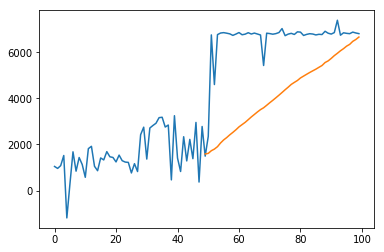

In [15]:
plt.plot(rewards[0:100])
_ = plt.ylim()
rolling_mean = pd.Series(rewards[0:100]).rolling(50).mean()
plt.plot(rolling_mean);

## Position

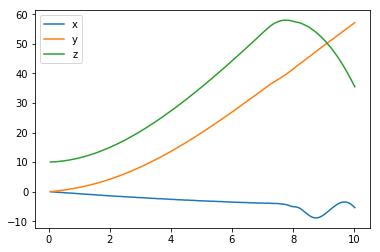

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_results['time'], best_results['x'], label='x')
plt.plot(best_results['time'], best_results['y'], label='y')
plt.plot(best_results['time'], best_results['z'], label='z')
plt.legend()
_ = plt.ylim()


## Rotor speed

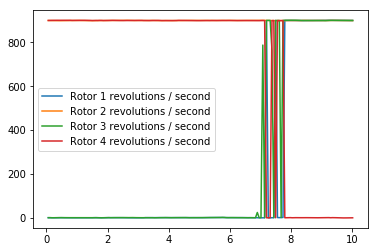

In [18]:
plt.plot(best_results['time'], best_results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(best_results['time'], best_results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(best_results['time'], best_results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(best_results['time'], best_results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()

## Rotation

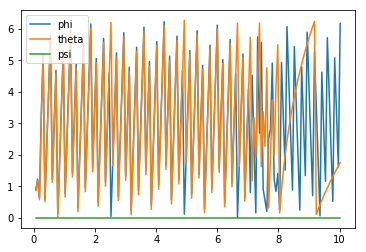

In [19]:
plt.plot(best_results['time'], best_results['phi'], label='phi')
plt.plot(best_results['time'], best_results['theta'], label='theta')
plt.plot(best_results['time'], best_results['psi'], label='psi')
plt.legend()

## Velocity

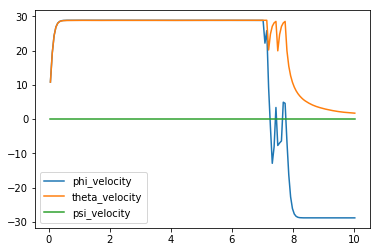

In [20]:
plt.plot(best_results['time'], best_results['phi_velocity'], label='phi_velocity')
plt.plot(best_results['time'], best_results['theta_velocity'], label='theta_velocity')
plt.plot(best_results['time'], best_results['psi_velocity'], label='psi_velocity')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: <br>
I tried to teach my quadcopter a simple takeoff task. The quadcopter has to take off from position (0,0,10) and then hover at (100,100,100). <br>

- For the reward
    - a constant reward is added to reward the ongoing of the flight
    - a penalty is subtracted for large rotation and for being away from the target
    - a large reward `10000` is added when the copter is near the target, to teach the copter that it has to stay near the target. <br><br><br>

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:<br>
I used the suggested DDPG algorithm. and only played with the reward function. <br>

**Actor**:<br> 
32-64-32 layer network with a RELU activation after each layer followed by a final Dense layer with a sigmoid action at the output. The output then gets scaled to the required range by means of a lambda layer. The adam optimizer is used for optimization.

**Critic**: <br>
Two-path network. The first path estimates the state and the second path the action. Each path comprises of two 32-64 node layers. Both paths are then added up and passed through a final RELU action layer. Since we have multiple neurons in the output layer we add another densely connected layer (one output neuron) that represents the Q-value. The adam optimizer is used for optimization. <br><br><br>

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: <br>
it was hard at the beginning, then it began to pick it up at around episode 500

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: <br><br>
- getting started was hard for me until I used the optional code. Also debugging the simulation is not efficicent, it would be better if there was a video simulation to see how the quadcopter perform (especially for the rotation).
- I found that quadcopter control is harder than I imagined.